In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# [](http://)Group 21 memebers
* Sai Ohm Saie Paine
* Hlyan Wint Aung
* Nang Lao Pha

### Credit Member Statement

This form recognises individual member contributions to the project, aiming to reduce disputes and encourage effective collaboration. The following contributions were agreed upon by all group members:

**Name 1: Sai Ohm Saie Paine**  
- Data preprocessing, cleaning, and visualization (30%)
- Helped with dataset preparation and exploratory data analysis (35%)    
- Built and evaluated machine learning models (33%)
- Assisted in model development and interpretation (45%)
- Wrote and formatted sections of the report (25%)

**Name 2: Nang Lao Pha**  
- Data preprocessing, cleaning, and visualization (30%)
- Helped with dataset preparation and exploratory data analysis (35%)    
- Built and evaluated machine learning models (33%)
- Assisted in model development and interpretation (20%)
- - Wrote and formatted sections of the report (50%)

**Name 3: Hylan Wint Aung**  
- Data preprocessing, cleaning, and visualization (40%)
- Helped with dataset preparation and exploratory data analysis (30%)    
- Built and evaluated machine learning models (33%)
- Assisted in model development and interpretation (35%)
- Wrote and formatted sections of the report (25%)

*Note: Percentages reflect the approximate workload distribution agreed upon by the team.*

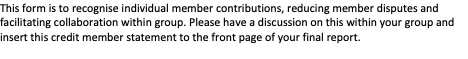
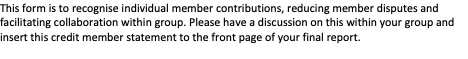
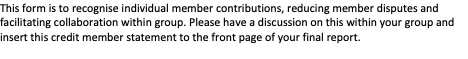
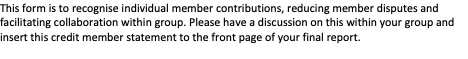

# Task 1: Dataset

## Dataset Justification: IBM HR Analytics Employee Attrition & Performance

We have selected the IBM HR Analytics Employee Attrition & Performance dataset from Kaggle for our data mining project. The dataset contains 1,470 rows and 35 attributes, covering a range of employee demographic, work-related, and organizational data.

### Key Justifications:

Data Variety: The dataset includes numerical, categorical, ordinal, and Boolean variables (e.g., Age, JobRole, OverTime, Attrition).

Preprocessing Requirements: It contains class imbalance, correlated features, and mixed data types, which require techniques such as encoding, resampling (e.g., SMOTE), and feature selection.

Data Mining Suitability: The dataset requires classification models, hyperparameter tuning, and evaluation metrics beyond simple analysis to extract meaningful patterns.

Domain Relevance: It offers valuable insights into employee behavior and attrition, aligning well with real-world HR analytics.

This dataset provides a strong foundation for applying data mining methodologies and demonstrating end-to-end project execution.

In [26]:
# Load the dataset
file_path = '/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Step 2: Make a copy of the dataset to work with
df_copy = df.copy()

# Display the first few rows of the dataset
df_copy.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
# Get basic info about the dataset (data types and non-null counts)
df_info = df_copy.info()

# Get a statistical summary of numerical features
df_description = df_copy.describe()

# Check for missing values
missing_values = df_copy.isnull().sum()

# Display the basic information and missing values
df_info, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
 count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
 mean     36.923810   802.485714          9.192517     2.912925            1.0   
 std       9.135373   403.509100          8.106864     1.024165            0.0   
 min      18.000000   102.000000          1.000000     1.000000            1.0   
 25%      30.000000   465.000000          2.000000     2.000000            1.0   
 50%      36.000000   802.000000          7.000000     3.000000            1.0   
 75%      43.000000  1157.000000         14.000000     4.000000            1.0   
 max      60.000000  1499.000000         29.000000     5.000000            1.0   
 
        EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
 count     1470.000000              1470.000000  1470.000000     1470.000000   
 mean      1024.865306                 2.721769    65.891156        2.729932   
 std        6

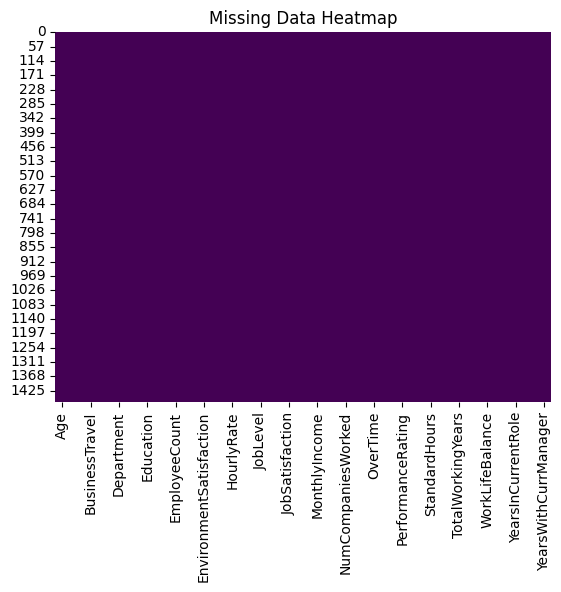

In [28]:
# Visualize missing data (if any)
sns.heatmap(df_copy.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

We selected the employee attrition dataset because employee turnover is a critical issue for businesses, impacting costs, knowledge retention, and productivity. This dataset provides valuable insights into the factors contributing to attrition, including job satisfaction, compensation, and work-life balance. By analyzing it, I hoped to identify key predictors of employee departure and develop a model that can predict future attrition. The ultimate goal is to assist HR departments in designing effective retention strategies to reduce turnover.

# Task 2: business scenarios

## Initial Questions:
#### What are the key drivers of employee attrition?

We started off by wanting to understand what part of the job, including overtime, work-life balance, amount of time at the company, and job satisfaction, has the greatest impact on whether an employee is most likely to leave the company.

#### Can we predict whether an employee is going to leave or not based on their profile?

Using machine learning, We intended to build a model which could predict the chances of whether an employee would stay or leave the organization based on their traits.

## Questions After EDA:
#### What is the effect of interaction between overtime and job satisfaction on the probability of attrition?

After examining the data, We discovered that employees with low job satisfaction and those who work overtime were more likely to leave. I would like to see whether this composite variable is a good predictor.

#### Are employees in certain departments or job classes vulnerable to higher attrition rates than others?

When looking at the data, We realized that attrition levels might be varied by department or job function. We would like to know if employees in departments like Sales or Research & Development leave at a greater percent than the employees in other departments.

### Identifying Categorical and Numerical Columns

In [29]:
# Identify categorical and numerical columns
categorical_cols = df_copy.select_dtypes(include=['object']).columns
numerical_cols = df_copy.select_dtypes(include=['number']).columns

# Display the categorical and numerical features
categorical_cols, numerical_cols

(Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object'),
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'))

### Get the summary of categorical features

In [30]:
# Get the summary of categorical features
df_copy[categorical_cols].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Visualizing Distributions of Numerical Features

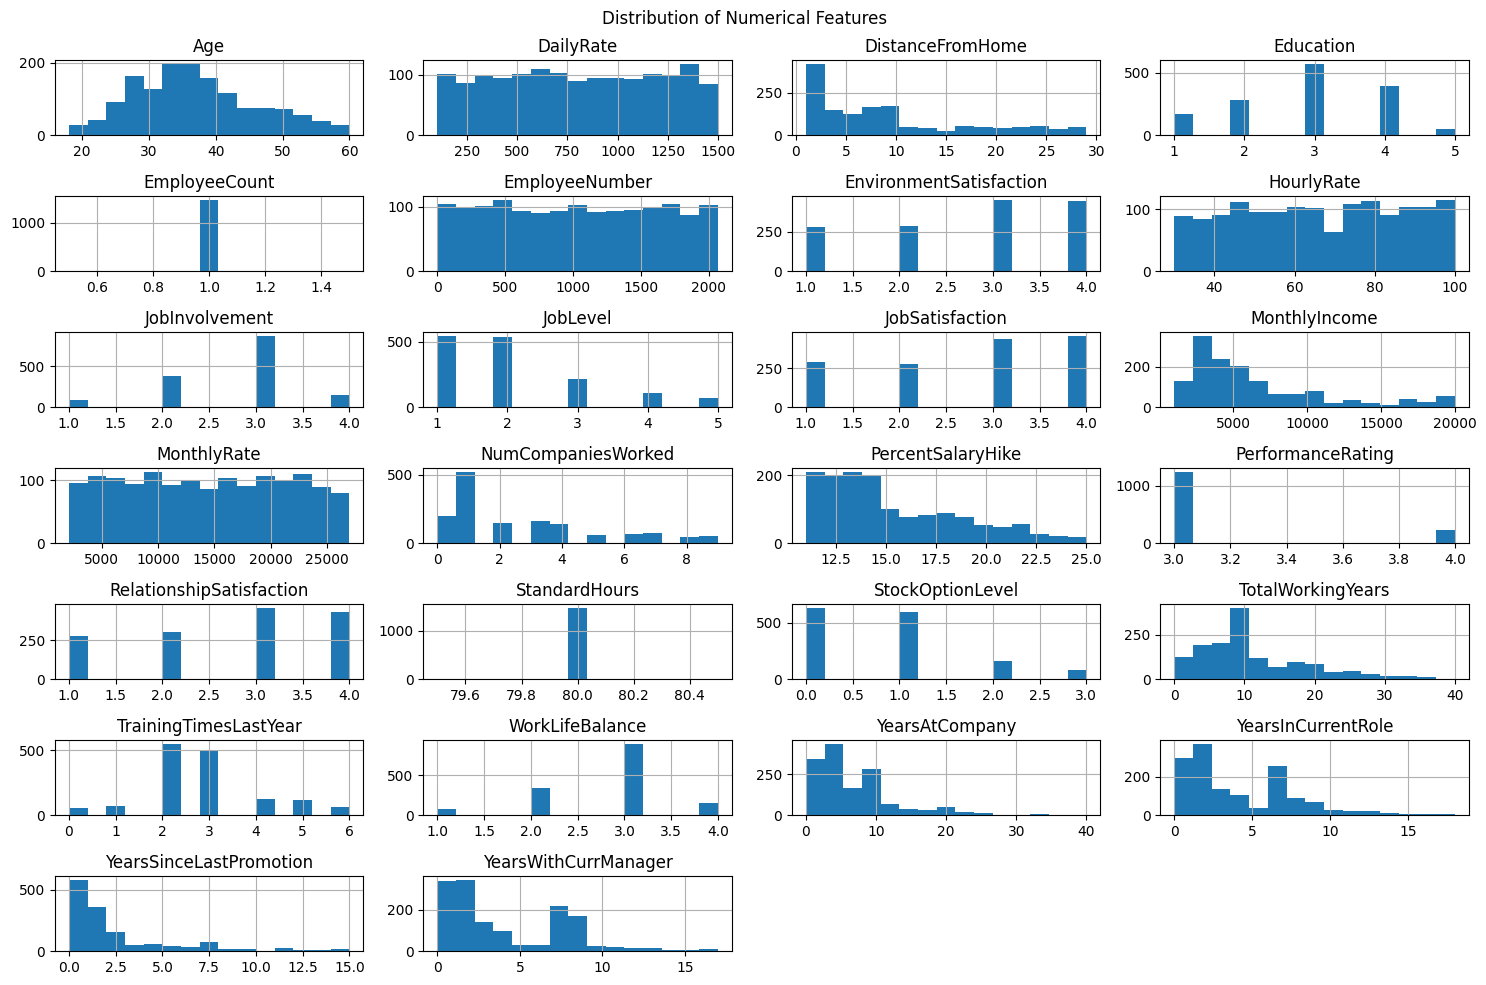

In [31]:
# Plot histograms of numerical features with a dynamic layout
ncols = 4  # Set number of columns
nrows = (len(numerical_cols) // ncols) + (len(numerical_cols) % ncols > 0)  # Calculate rows dynamically

df_copy[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(nrows, ncols))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Tast-3: preprocessing

### Data Preprocessing:

In this step, the dataset was cleaned and prepared for modeling using the following steps:

- **Handling Missing Values**: Missing data was addressed through imputation or removal.
- **Categorical Encoding**: Categorical variables (**JobRole**, **Department**, **BusinessTravel**) were one-hot encoded.
- **Feature Selection**: Relevant features were selected based on **EDA** and domain knowledge.
- **Class Imbalance Handling**: **SMOTE** was used for oversampling, and **ENN** was applied for cleaning noisy instances.
- **Feature Scaling**: Numerical features (**Age**, **MonthlyIncome**, **YearsAtCompany**, ... ) were scaled using **StandardScaler**.
- **Train-Test Split**: The data was split into **80% training** and **20% testing** with **stratified sampling** on **Attrition**.


### Encoding Categorical Features

In [32]:
# Encoding categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)

# Display the first few rows after encoding
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows after scaling
df_encoded.head() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,True,False,False,False,False,False,False,True,False,False


## Exploratary Data Analysis (EDA)

### Visualize the Distribution of Numerical Features

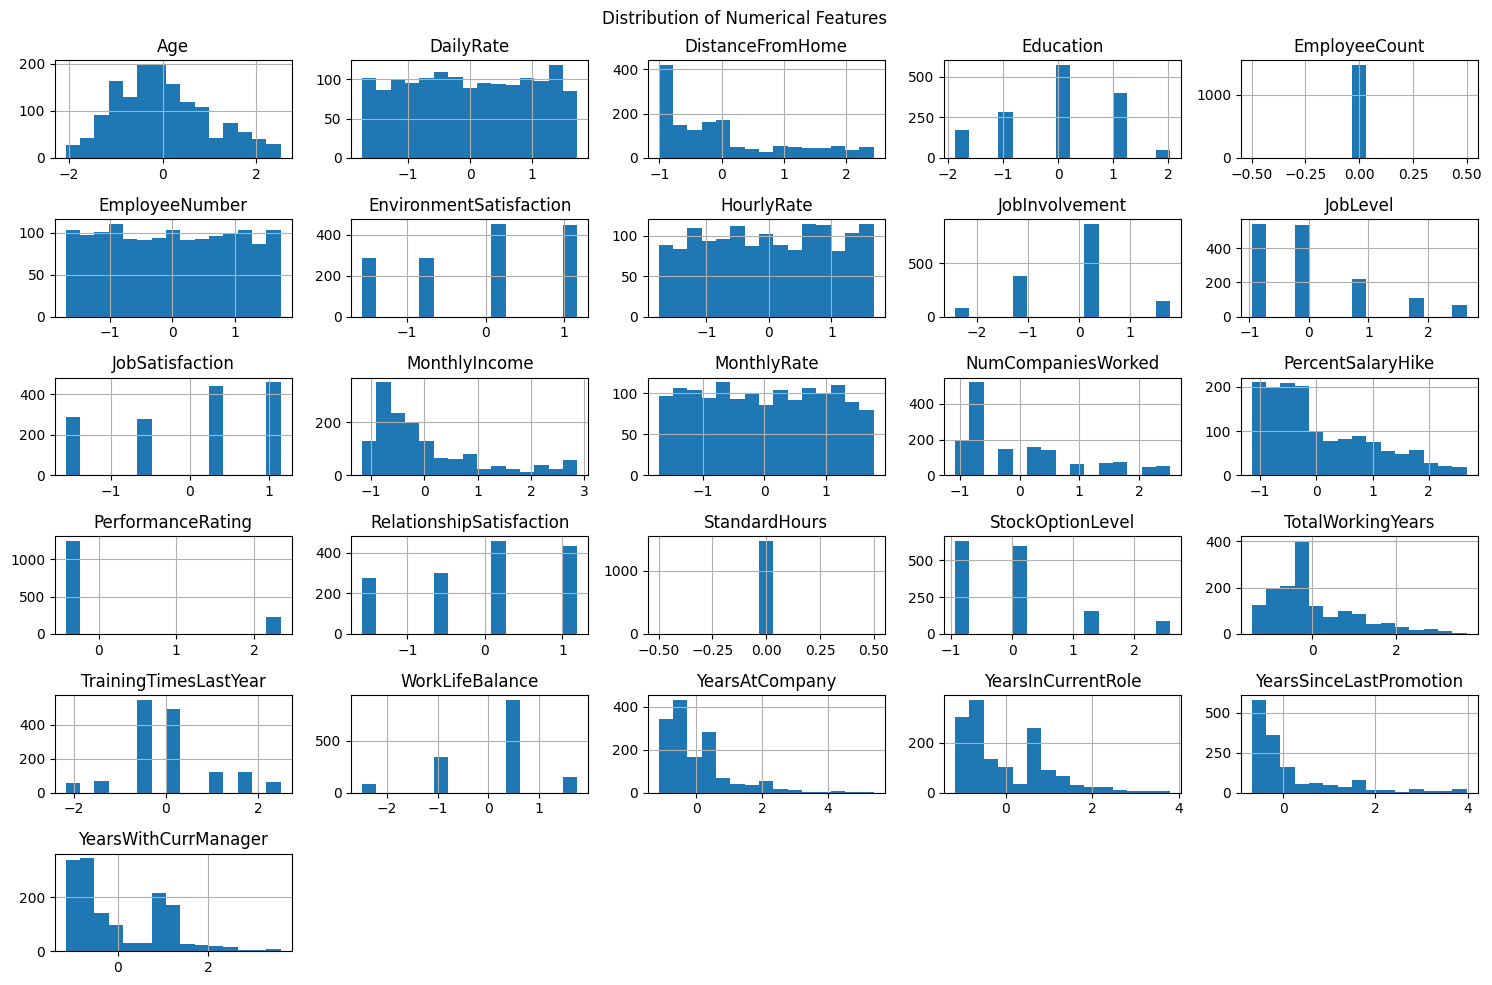

In [34]:
# Visualize the distribution of numerical features
df_encoded[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(6, 5))  # Adjust layout for better fit
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()  # Ensure that titles don't overlap
plt.show()

### Visualize the Distribution of Categorical Features

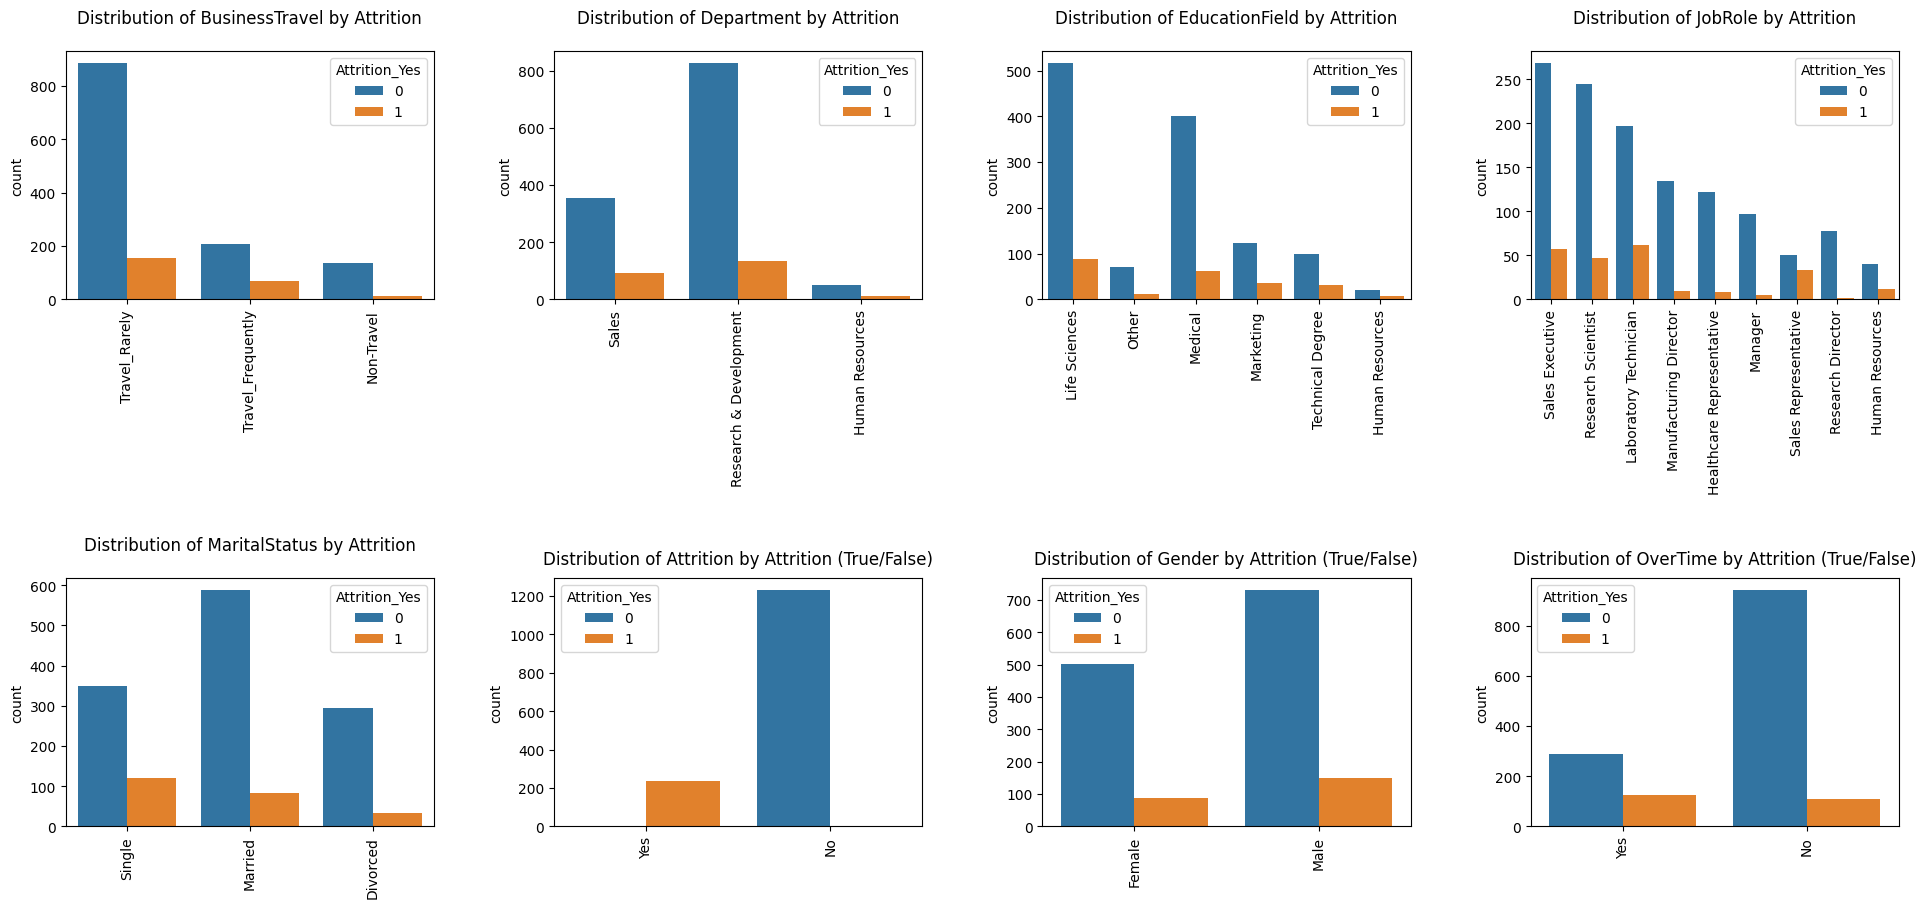

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the 'Attrition_Yes' column based on 'Attrition'
df['Attrition_Yes'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical columns based on their unique values
categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # All categorical columns

# Columns with exactly 2 unique values (for True/False split)
cols_with_two_values = [col for col in categorical_cols if df[col].nunique() == 2]

# Columns with more than 2 unique values (single column per category)
cols_with_more_than_two_values = [col for col in categorical_cols if df[col].nunique() > 2]

# Dynamically adjust the number of columns based on the number of plots
n_cols = 4  # Set a reasonable column count for a better grid
n_rows = int(np.ceil((len(cols_with_more_than_two_values) + len(cols_with_two_values)) / n_cols))

# Create subplots with a larger figsize for clearer visuals
fig_size = (n_cols * 5, n_rows * 5)  # Make figure size dynamically based on grid size
fig, axes = plt.subplots(n_rows, n_cols, figsize=fig_size)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Initialize counter for subplot position
ax_counter = 0

# Loop through columns with more than two unique values (single column per category)
for col in cols_with_more_than_two_values:
    sns.countplot(x=col, hue='Attrition_Yes', data=df, ax=axes[ax_counter])
    axes[ax_counter].set_title(f'Distribution of {col} by Attrition', fontsize=12, pad=20)  # Adjust pad to move title
    axes[ax_counter].tick_params(axis='x', rotation=90)  # Rotate labels for better readability
    axes[ax_counter].set_xlabel('')
    ax_counter += 1

# Loop through columns with two unique values (True/False split)
for col in cols_with_two_values:
    sns.countplot(x=col, hue='Attrition_Yes', data=df, ax=axes[ax_counter])
    axes[ax_counter].set_title(f'Distribution of {col} by Attrition (True/False)', fontsize=12, pad=10)  # Adjust pad to move title
    axes[ax_counter].tick_params(axis='x', rotation=90)  # Rotate labels more if needed to prevent overlap
    axes[ax_counter].set_xlabel('')
    ax_counter += 1

# Hide any empty subplots
for j in range(ax_counter, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing and remove overlap
plt.tight_layout(pad=4.0)  # Increase the padding between subplots for better clarity
plt.show()

### Plot the Relationship Between Key Features and Attrition

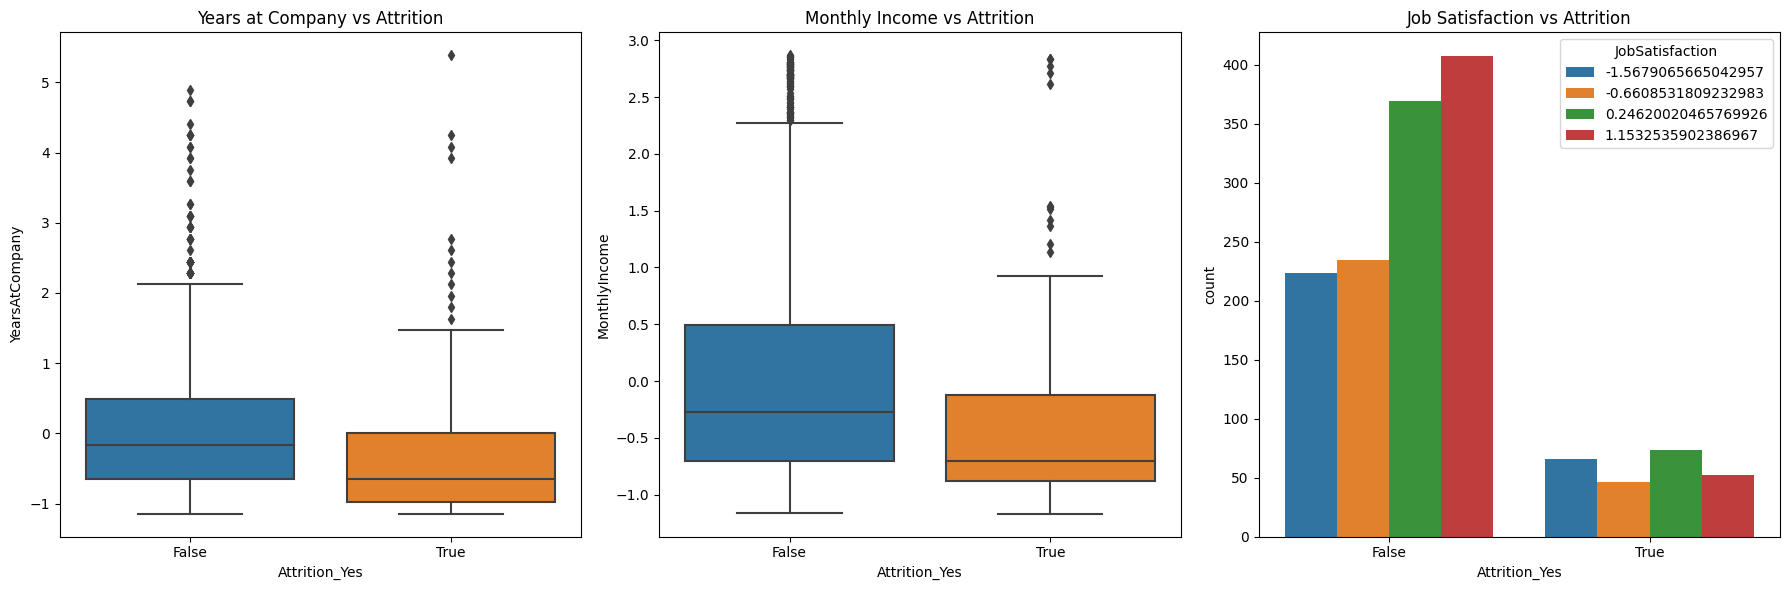

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numerical features against Attrition in one row

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Boxplot for 'YearsAtCompany' vs 'Attrition'
sns.boxplot(x='Attrition_Yes', y='YearsAtCompany', data=df_encoded, ax=axes[0])
axes[0].set_title('Years at Company vs Attrition')

# Boxplot for 'MonthlyIncome' vs 'Attrition'
sns.boxplot(x='Attrition_Yes', y='MonthlyIncome', data=df_encoded, ax=axes[1])
axes[1].set_title('Monthly Income vs Attrition')

# Countplot for 'JobSatisfaction' vs 'Attrition'
sns.countplot(x='Attrition_Yes', hue='JobSatisfaction', data=df_encoded, ax=axes[2])
axes[2].set_title('Job Satisfaction vs Attrition')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

### Check Correlations Between Numerical Features

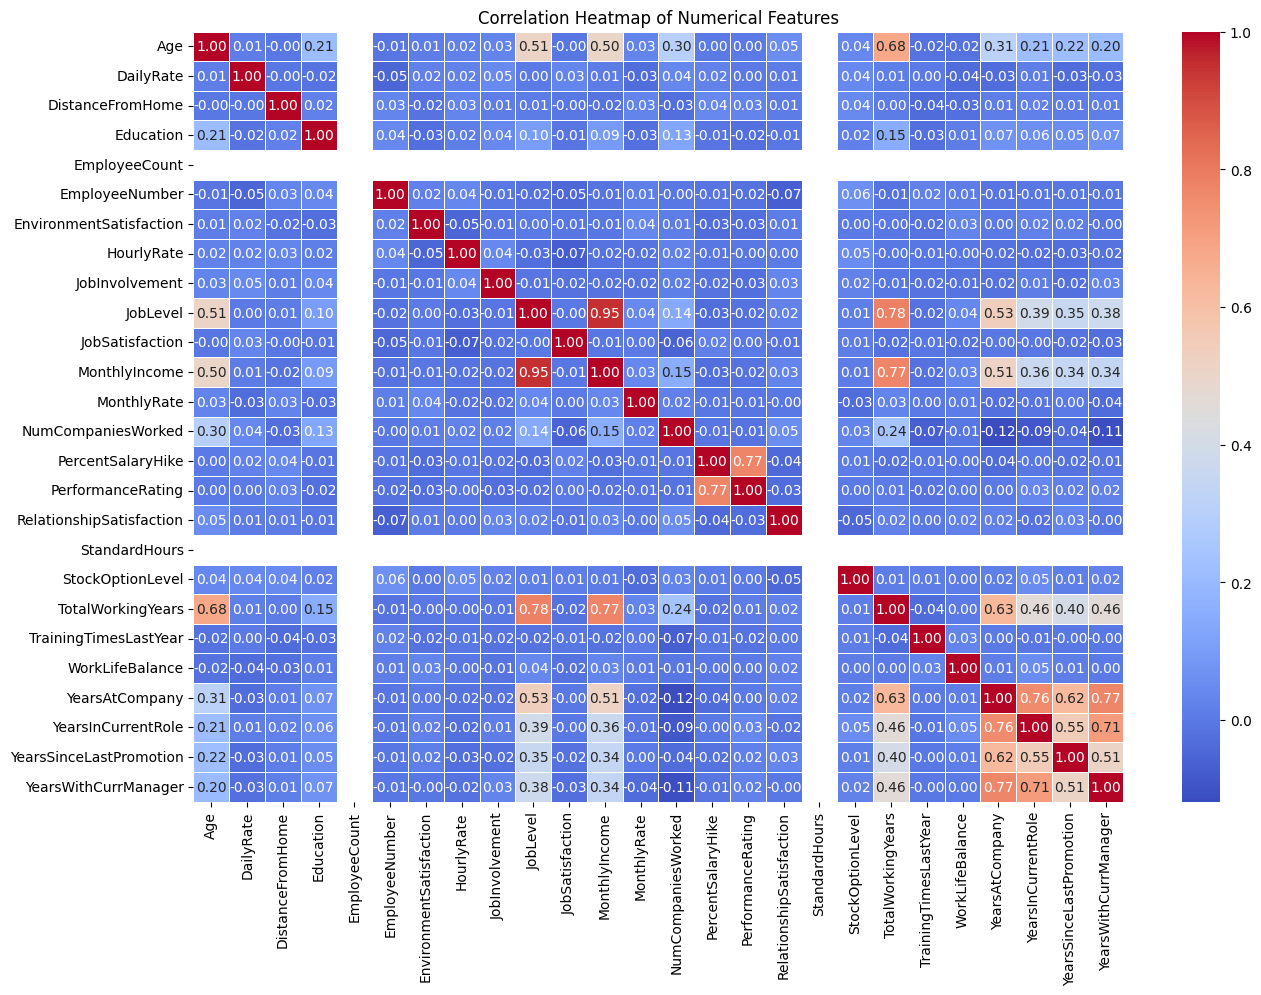

In [37]:
# Correlation heatmap of numerical features
correlation_matrix = df_encoded[numerical_cols].corr()  # Calculate correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Visualize the Relationship Between Key Features and Attrition (For One-Hot Encoded Features)

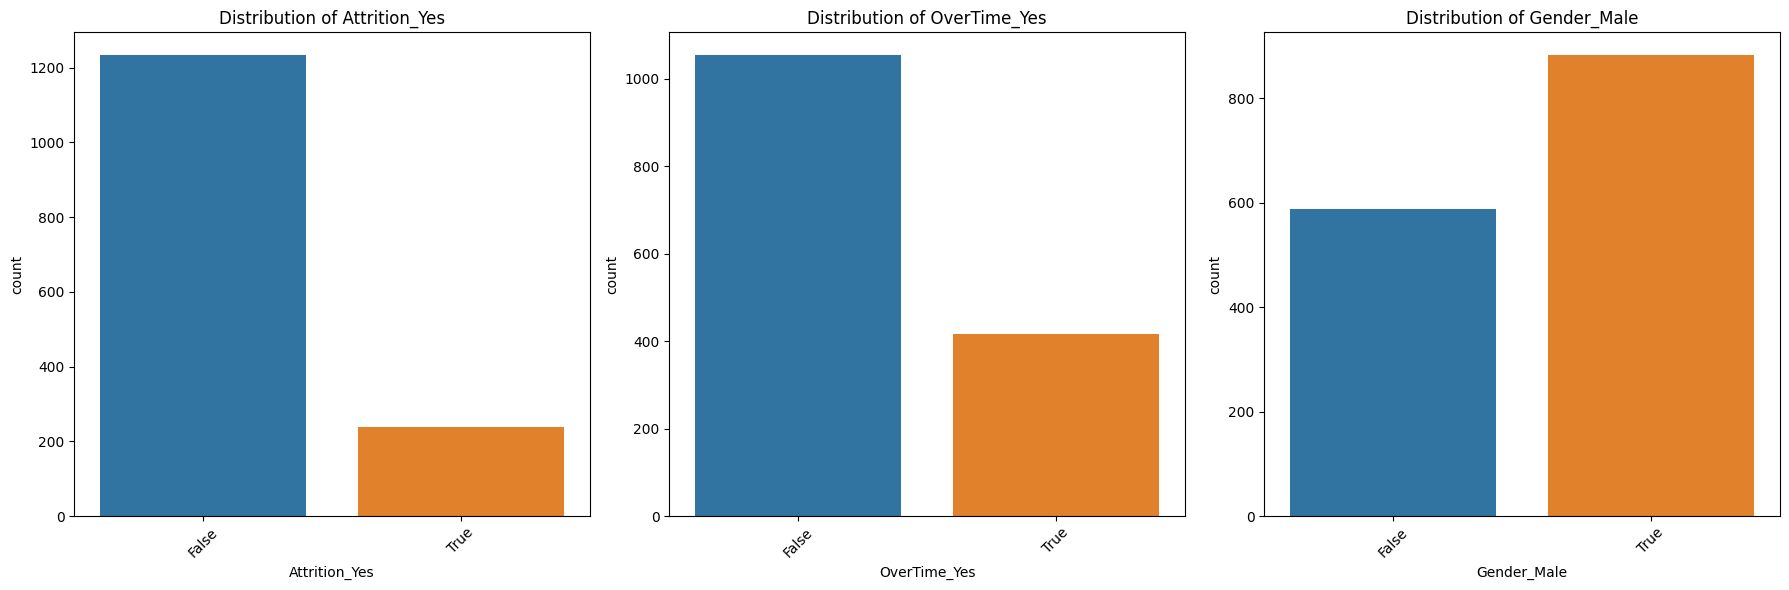

In [38]:
# Manually specifying one-hot encoded columns related to 'Attrition', 'OverTime', etc.
one_hot_encoded_cols = ['Attrition_Yes', 'OverTime_Yes', 'Gender_Male']

# Plot the distribution of one-hot encoded features in one row
fig, axes = plt.subplots(1, len(one_hot_encoded_cols), figsize=(18, 6))  # 1 row, n columns

# Plot each one-hot encoded column
for i, col in enumerate(one_hot_encoded_cols):
    sns.countplot(x=col, data=df_encoded, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

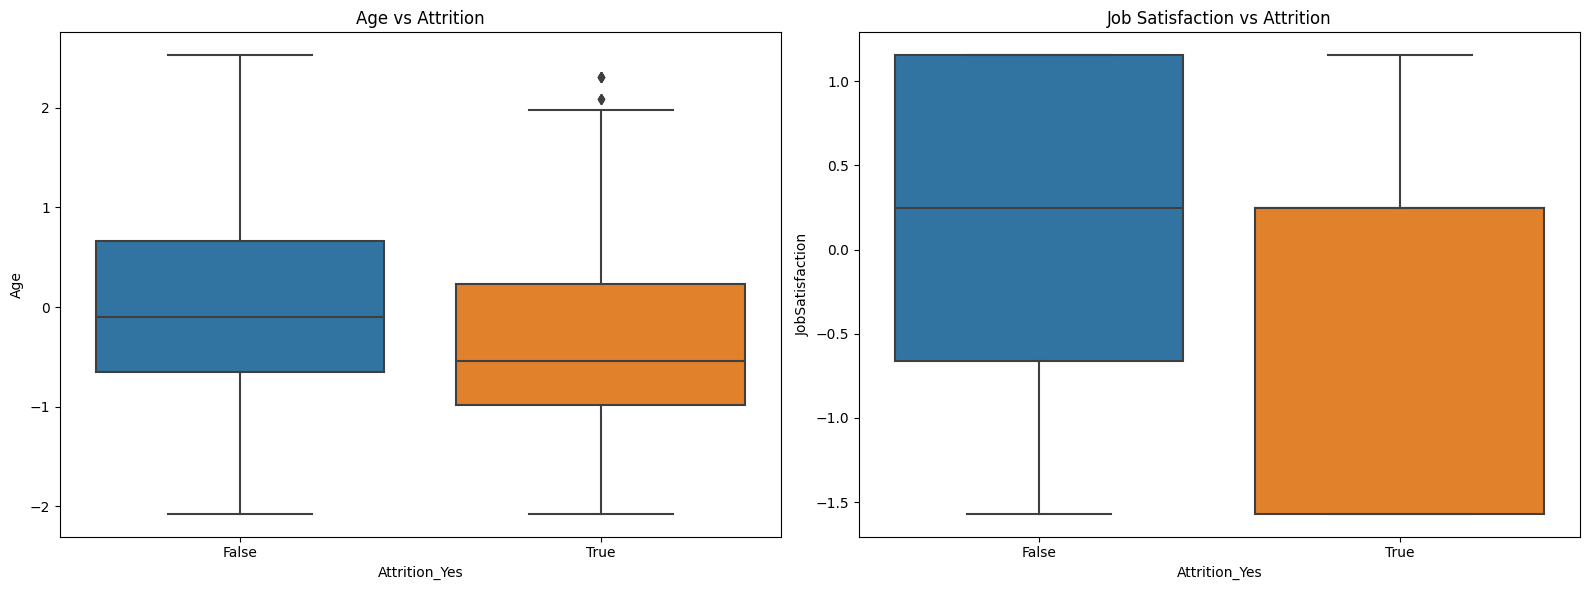

In [39]:
# Plot the distribution of Age and JobSatisfaction for employees who left vs stayed
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot Age vs Attrition
sns.boxplot(x='Attrition_Yes', y='Age', data=df_encoded, ax=axes[0])
axes[0].set_title('Age vs Attrition')

# Plot JobSatisfaction vs Attrition
sns.boxplot(x='Attrition_Yes', y='JobSatisfaction', data=df_encoded, ax=axes[1])
axes[1].set_title('Job Satisfaction vs Attrition')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


### Selected Features

In [40]:
# List of selected features based on EDA findings
selected_features = [
    'Age', 'WorkLifeBalance', 'DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome',
    'YearsAtCompany', 'OverTime_Yes', 'Gender_Male', 
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 
    'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'Department_Research & Development', 'Department_Sales',
    'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely'
]

# Create a new DataFrame with only the selected features
df_selected = df_encoded[selected_features + ['Attrition_Yes']]  # Including the target variable

# You can use df_selected for training the model.
df_selected.head()
# df_selected.shape

,Age,WorkLifeBalance,DistanceFromHome,JobSatisfaction,MonthlyIncome,YearsAtCompany,OverTime_Yes,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Attrition_Yes
0,0.446350,-2.493820,-1.010909,1.153254,-0.108350,-0.164613,True,False,False,False,...,False,False,False,True,False,False,True,False,True,True
1,1.322365,0.338096,-0.147150,-0.660853,-0.291719,0.488508,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
2,0.008343,0.338096,-0.887515,0.246200,-0.937654,-1.144294,True,True,False,True,...,False,False,False,False,False,True,False,False,True,True
3,-0.429664,0.338096,-0.764121,0.246200,-0.763634,0.161947,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
4,-1.086676,0.338096,-0.887515,-0.660853,-0.644858,-0.817734,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False


### Split Data into Train and Test Sets

In [41]:
# Ensure test set is fixed once and reused
X = df_selected.drop("Attrition_Yes", axis=1)
y = df_selected["Attrition_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then apply SMOTE on training set ONLY
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check to confirm shape is preserved
print("Train shape (after SMOTE):", X_train_res.shape, y_train_res.shape)
print("Test shape (unchanged):", X_test.shape, y_test.shape)


Train shape (after SMOTE): (1972, 20) (1972,)
Test shape (unchanged): (294, 20) (294,)


# Task-4: ARM

In [42]:
# Apply one or more ARM techiques, see prac-3-ARM
# Report your results based on your code output

# Task-5: Classification

## Random Forest

Accuracy: 86.73%
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       247
        True       0.62      0.45      0.52        47

    accuracy                           0.87       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.85      0.87      0.86       294



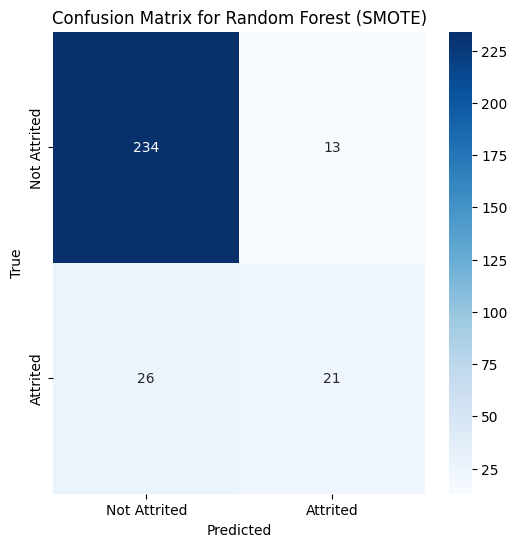

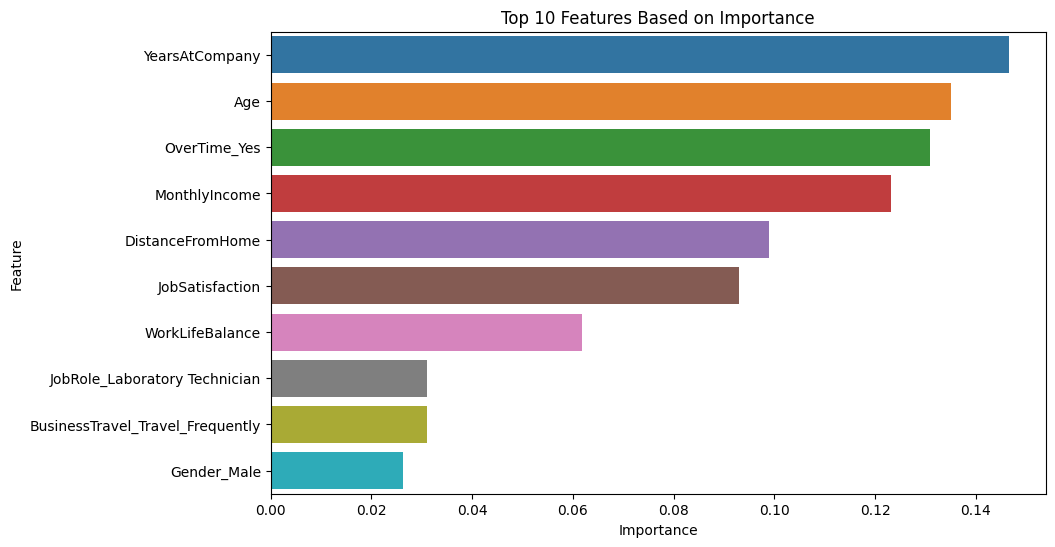

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the Random Forest Classifier using SMOTE-resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)

# Step 2: Make predictions on the original test set
y_pred = rf_model.predict(X_test)

# Step 3: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Random Forest (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 5: Feature Importance Plot
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Based on Importance')
plt.show()

## Decision Tree

Decision Tree Accuracy (SMOTE + ENN + Tuning): 97.28%
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       247
        True       1.00      0.83      0.91        47

    accuracy                           0.97       294
   macro avg       0.98      0.91      0.95       294
weighted avg       0.97      0.97      0.97       294



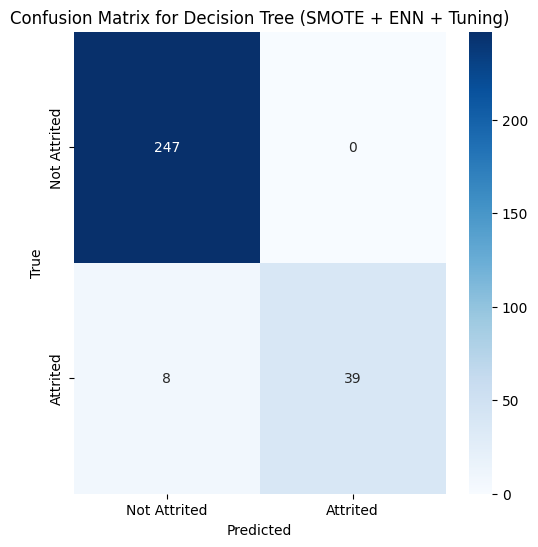

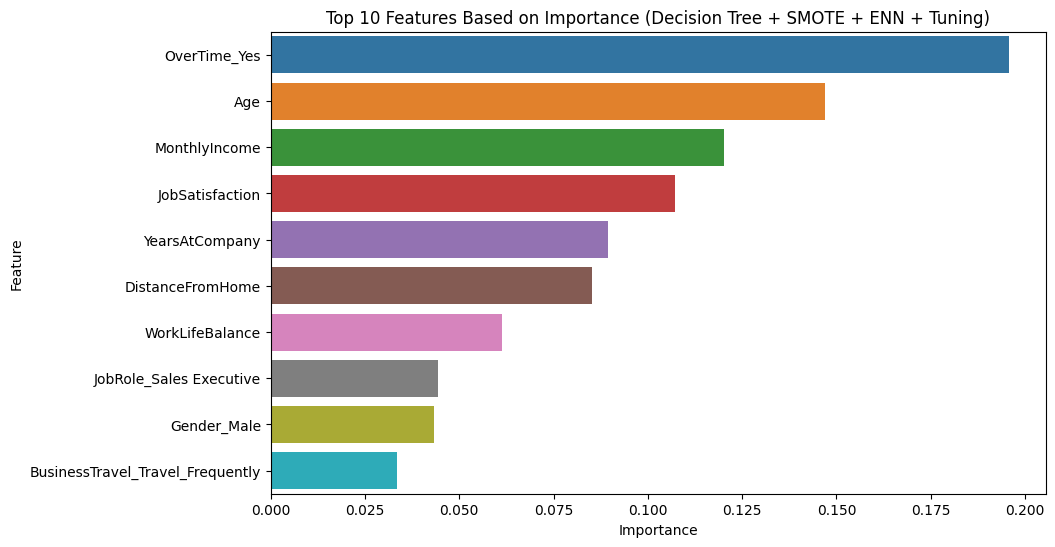

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Apply SMOTE to balance the classes (this has already been done)
smote = SMOTE(random_state=42)
enn = EditedNearestNeighbours()


# Step 1: Apply SMOTE + ENN (resampling) to the training data
pipeline = Pipeline([('smote', smote), ('enn', enn)])
X_train_res, y_train_res = pipeline.fit_resample(X, y)

# Step 2: Define the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
}

# Step 4: Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Step 5: Train the model using GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Step 6: Get the best model from grid search
best_dt_model = grid_search.best_estimator_

# Step 7: Make predictions on the test data
y_pred = best_dt_model.predict(X_test)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (SMOTE + ENN + Tuning): {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Decision Tree (SMOTE + ENN + Tuning)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 10: Feature Importance Plot
importances = best_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Based on Importance (Decision Tree + SMOTE + ENN + Tuning)')
plt.show()

# Step 11: Print best hyperparameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Task-6: Clustering

FINAL KMeans Accuracy (Best 2 of 3 Clusters): 80.76%
Based on best-matching 2 clusters to binary attrition


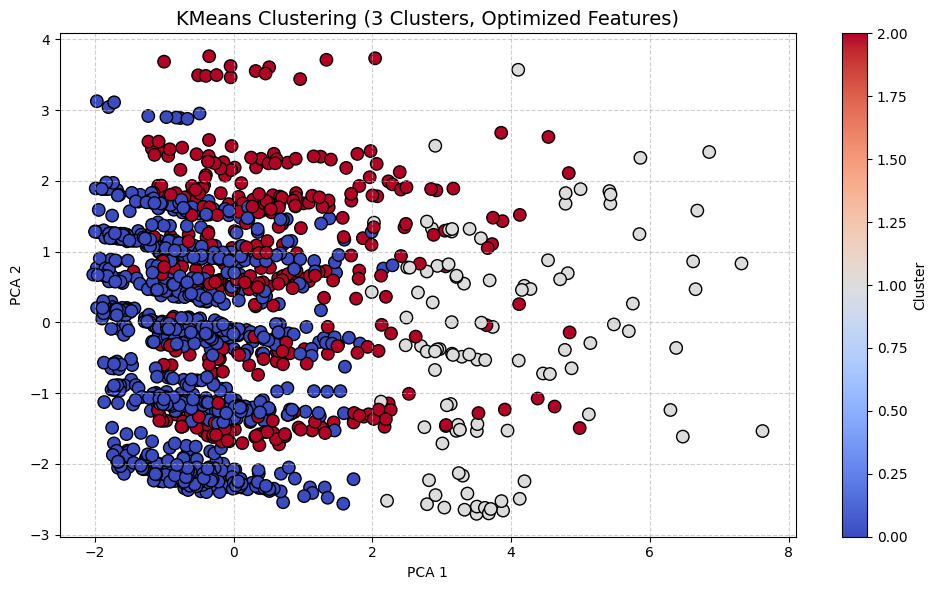

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# STEP 1: One-hot encode categorical features
categorical_cols = ['OverTime', 'Gender', 'JobRole', 'BusinessTravel']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# STEP 2: Feature engineering
df_encoded['IncomePerYear'] = df_encoded['MonthlyIncome'] / (df_encoded['YearsAtCompany'] + 1)
df_encoded['SatisfactionRatio'] = df_encoded['JobSatisfaction'] / (df_encoded['WorkLifeBalance'] + 1)
df_encoded['LoyaltyRatio'] = df_encoded['YearsAtCompany'] / (df_encoded['DistanceFromHome'] + 1)
df_encoded['StressIncome'] = df_encoded['OverTime_Yes'] * df_encoded['MonthlyIncome']

# STEP 3: Final optimized feature set
features = [
    'IncomePerYear', 'SatisfactionRatio', 'LoyaltyRatio', 'StressIncome',
    'MonthlyIncome', 'JobSatisfaction', 'OverTime_Yes', 'Gender_Male',
    'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Manager',
    'BusinessTravel_Travel_Frequently'
]

# STEP 4: Prepare scaled data
X = df_encoded[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_encoded['Cluster'] = clusters

# STEP 6: Convert Attrition to binary
df_encoded['Attrition_Binary'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})
true_labels = df_encoded['Attrition_Binary'].values

# STEP 7: Function to match 2 of 3 clusters to binary labels
def cluster_accuracy(clusters, true_labels):
    best_acc = 0
    labels = np.unique(clusters)
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            mask = np.isin(clusters, [labels[i], labels[j]])
            subset_clusters = pd.Series(clusters[mask]).map({labels[i]: 0, labels[j]: 1}).values
            subset_true = true_labels[mask]
            acc1 = accuracy_score(subset_true, subset_clusters)
            acc2 = accuracy_score(subset_true, 1 - subset_clusters)
            best_acc = max(best_acc, acc1, acc2)
    return best_acc

# STEP 8: Accuracy
accuracy = cluster_accuracy(clusters, true_labels)

# STEP 9: PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_encoded['PCA1'], df_encoded['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# STEP 10: Output results
print("=" * 65)
print(f"FINAL KMeans Accuracy (Best 2 of 3 Clusters): {accuracy * 100:.2f}%")
print("Based on best-matching 2 clusters to binary attrition")
print("=" * 65)

# STEP 11: Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['PCA1'], df_encoded['PCA2'], c=clusters, cmap='coolwarm', edgecolor='k', s=80)
plt.title("KMeans Clustering (3 Clusters, Optimized Features)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Task-7: Project specific and final results

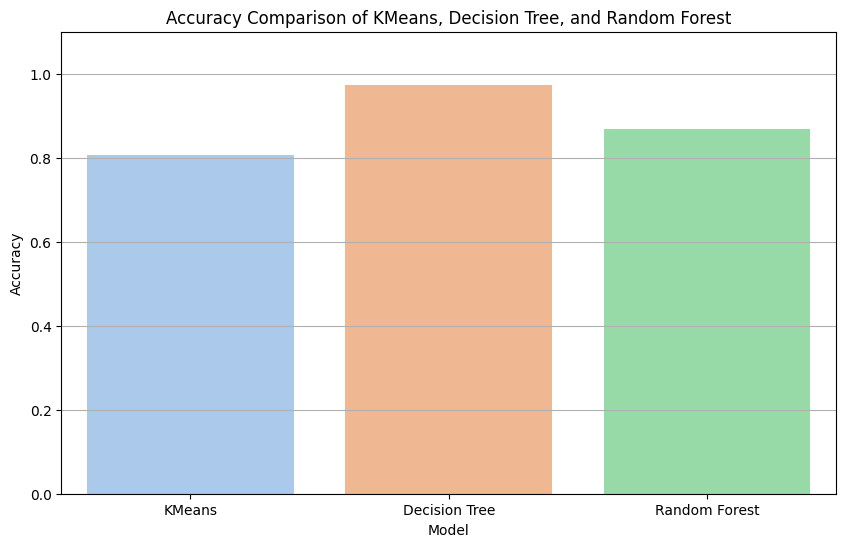

In [46]:
# Accuracy values from your screenshots
model_names = ['KMeans', 'Decision Tree', 'Random Forest']
accuracies = [0.8076, 0.9728, 0.8673]

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')
plt.ylim(0, 1.1)
plt.title('Accuracy Comparison of KMeans, Decision Tree, and Random Forest')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()
